# Problem 1.1

#### Simulate an epidemic, every week correspond to an iteration in the for cicle in which we update the states of the nodes.

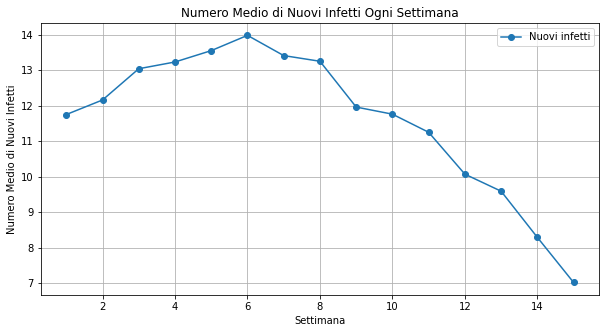

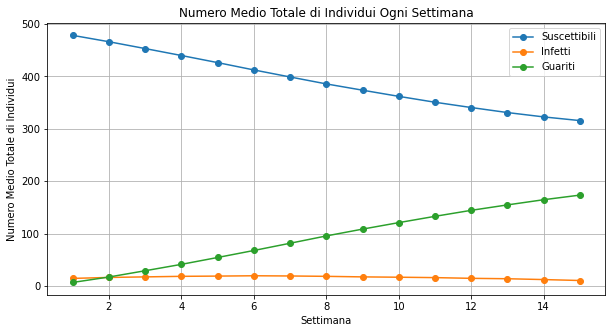

In [16]:
import networkx as nx
import numpy as np
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt
import scipy as sp

# Set random seed for reproducibility
np.random.seed(42)

# Function to simulate the epidemic on a given graph, with specified parameters and duration
def simulate_epidemic_sparse(graph, beta, rho, initial_infected, num_weeks):
    num_nodes = graph.shape[0]

    # Initialize the states for each node (S, I, R)
    states = np.zeros(num_nodes)

    # Inizializziamo infect nodes
    initial_infected_nodes = np.random.choice(num_nodes, initial_infected, replace=False)
    states[initial_infected_nodes] = 1  # Impostiamo lo stato a infetto

    # Lists for storing results
    newly_infected_per_week = []
    total_states_per_week = {'S': [], 'I': [], 'R': []}

    # Simulation cycle
    for week in range(num_weeks):
        # Compute transition probabilities
        infected_neighbors = graph @ (states == 1)
        infection_prob = 1 - np.power((1 - beta), infected_neighbors)
        recovery_prob = rho

        # Update the states 
        infected_mask = (states == 0) & (np.random.rand(num_nodes) < infection_prob)
        recovered_mask = (states == 1) & (np.random.rand(num_nodes) < recovery_prob)

        states[infected_mask] = 1  # Di nuovo infetti
        states[recovered_mask] = 2  # Guariti

        # Store the results
        newly_infected_per_week.append(np.sum(infected_mask))
        total_states_per_week['S'].append(np.sum(states == 0))
        total_states_per_week['I'].append(np.sum(states == 1))
        total_states_per_week['R'].append(np.sum(states == 2))

    return newly_infected_per_week, total_states_per_week

# Funzione per plottare i risultati
def plot_results_sparse(newly_infected_per_week, total_states_per_week, num_weeks):
    weeks = np.arange(1, num_weeks + 1)

    # Plot the mean number of infects each week
    plt.figure(figsize=(10, 5))
    plt.plot(weeks, np.mean(newly_infected_per_week, axis=0), label='Nuovi infetti', marker='o')
    plt.xlabel('Settimana')
    plt.ylabel('Numero Medio di Nuovi Infetti')
    plt.title('Numero Medio di Nuovi Infetti Ogni Settimana')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the average total number of susceptible, infected, and cured individuals each week
    plt.figure(figsize=(10, 5))
    plt.plot(weeks, np.mean(total_states_per_week['S'], axis=0), label='Suscettibili', marker='o')
    plt.plot(weeks, np.mean(total_states_per_week['I'], axis=0), label='Infetti', marker='o')
    plt.plot(weeks, np.mean(total_states_per_week['R'], axis=0), label='Guariti', marker='o')
    plt.xlabel('Settimana')
    plt.ylabel('Numero Medio Totale di Individui')
    plt.title('Numero Medio Totale di Individui Ogni Settimana')
    plt.legend()
    plt.grid(True)
    plt.show()


N = 100
num_weeks = 15
beta = 0.3
rho = 0.7
initial_infected = 10

# Create a symmetric k-regular graph (G) with 500 nodes and k=4 using NetworkX
G = nx.random_regular_graph(4, 500, seed=42)

W = nx.adjacency_matrix(G)
#W = nx.convert_matrix.to_numpy_matrix(G)
Lambda = sp.sparse.lil_matrix(W)
 
newly_infected_per_week_all_sparse = []
total_states_per_week_all_sparse = {'S': [], 'I': [], 'R': []}

# Simulate the epidemic N times and compute mean values
for _ in range(N):
    newly_infected_per_week_sparse, total_states_per_week_sparse = simulate_epidemic_sparse(
        Lambda, beta, rho, initial_infected, num_weeks
    )
    newly_infected_per_week_all_sparse.append(newly_infected_per_week_sparse)
    total_states_per_week_all_sparse['S'].append(total_states_per_week_sparse['S'])
    total_states_per_week_all_sparse['I'].append(total_states_per_week_sparse['I'])
    total_states_per_week_all_sparse['R'].append(total_states_per_week_sparse['R'])

# Plot results
plot_results_sparse(newly_infected_per_week_all_sparse, total_states_per_week_all_sparse, num_weeks)

# Problem 1.2

#### Generate a random graph according to the preferential attachment model.

In [17]:
k = 4
total_nodes = 900
# Generate a complete Graph with k+1 nodes
G = nx.complete_graph(k+1)
W = nx.adjacency_matrix(G)
w = W.toarray().sum(axis=1)

In [18]:
if k % 2 == 0:
    for i in range(k+1, total_nodes):
        #print("start_1")
        w_for = np.copy(w)
        #print(w_for)
        G.add_node(i)
        for j in range(k//2):
            #print(w_for/sum(w_for))
            link = np.random.choice(len(w_for), p = w_for/sum(w_for))
            G.add_edge(i, link)
            w[link] += 1
            w_for[link] = 0
        w = np.append(w, k/2)
        #print(w)
else:
    for i in range(k+1, total_nodes):
        #print("start_1")
        w_for = np.copy(w)
        #print(w_for)
        G.add_node(i)
        num_links = k // 2 if i % 2 == 0 else k // 2 + 1
        for j in range(num_links):
            #print(w_for/sum(w_for))
            link = np.random.choice(len(w_for), p = w_for/sum(w_for))
            G.add_edge(i, link)
            w[link] += 1
            w_for[link] = 0
        w = np.append(w, num_links)
        #print(w)

In [19]:
# Check if the procedure is correct
(w == nx.adjacency_matrix(G).toarray().sum(axis=1)).all()

True

In [20]:
nx.adjacency_matrix(G).toarray().sum(axis=1).mean()

4.0

# Problem 2

In [21]:
k = 6
total_nodes = 500
# Generate a complete Graph with k+1 nodes
G = nx.complete_graph(k+1)
W = nx.adjacency_matrix(G)
w = W.toarray().sum(axis=1)

if k % 2 == 0:
    for i in range(k+1, total_nodes):
        #print("start_1")
        w_for = np.copy(w)
        #print(w_for)
        G.add_node(i)
        for j in range(k//2):
            #print(w_for/sum(w_for))
            link = np.random.choice(len(w_for), p = w_for/sum(w_for))
            G.add_edge(i, link)
            w[link] += 1
            w_for[link] = 0
        w = np.append(w, k/2)
        #print(w)
else:
    for i in range(k+1, total_nodes):
        #print("start_1")
        w_for = np.copy(w)
        #print(w_for)
        G.add_node(i)
        num_links = k // 2 if i % 2 == 0 else k // 2 + 1
        for j in range(num_links):
            #print(w_for/sum(w_for))
            link = np.random.choice(len(w_for), p = w_for/sum(w_for))
            G.add_edge(i, link)
            w[link] += 1
            w_for[link] = 0
        w = np.append(w, num_links)
        #print(w)
        
# Check if the procedure is correct
print((w == nx.adjacency_matrix(G).toarray().sum(axis=1)).all())

True


#### Use this graph to simulate the pandemic in the same way as before.

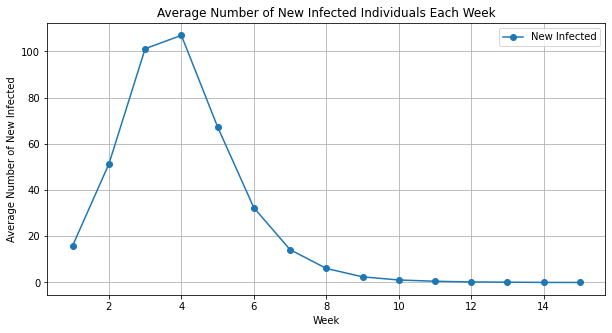

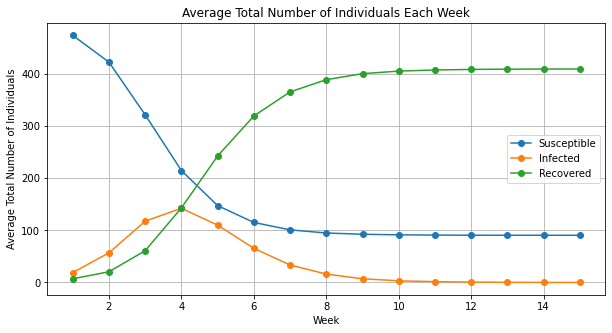

In [22]:
import networkx as nx
import numpy as np
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt

np.random.seed(42)

def simulate_epidemic_sparse(graph, beta, rho, initial_infected, num_weeks):
    num_nodes = graph.shape[0]

    # Initialize states for each node (S, I, R)
    states = np.zeros(num_nodes)

    # Initialize infected nodes
    initial_infected_nodes = np.random.choice(num_nodes, initial_infected, replace=False)
    states[initial_infected_nodes] = 1  # Set state to infected

    # Lists to store results
    newly_infected_per_week = []
    total_states_per_week = {'S': [], 'I': [], 'R': []}

    # Simulation loop
    for week in range(num_weeks):
        # Calculate infected neighbors and infection probability
        infected_neighbors = graph @ (states == 1)
        infection_prob = 1 - np.power((1 - beta), infected_neighbors)
        recovery_prob = rho

        # Update states based on infection and recovery probabilities
        infected_mask = (states == 0) & (np.random.rand(num_nodes) < infection_prob)
        recovered_mask = (states == 1) & (np.random.rand(num_nodes) < recovery_prob)

        states[infected_mask] = 1  # Newly infected
        states[recovered_mask] = 2  # Recovered

        # Store results
        newly_infected_per_week.append(np.sum(infected_mask))
        total_states_per_week['S'].append(np.sum(states == 0))
        total_states_per_week['I'].append(np.sum(states == 1))
        total_states_per_week['R'].append(np.sum(states == 2))

    return newly_infected_per_week, total_states_per_week

def plot_results_sparse(newly_infected_per_week, total_states_per_week, num_weeks):
    weeks = np.arange(1, num_weeks + 1)

    # Plot the average number of new infected individuals each week
    plt.figure(figsize=(10, 5))
    plt.plot(weeks, np.mean(newly_infected_per_week, axis=0), label='New Infected', marker='o')
    plt.xlabel('Week')
    plt.ylabel('Average Number of New Infected')
    plt.title('Average Number of New Infected Individuals Each Week')
    plt.legend()
    plt.grid(True)
    plt.savefig("Homework3_problem2")
    plt.show()

    # Plot the average total number of susceptible, infected, and recovered individuals each week
    plt.figure(figsize=(10, 5))
    plt.plot(weeks, np.mean(total_states_per_week['S'], axis=0), label='Susceptible', marker='o')
    plt.plot(weeks, np.mean(total_states_per_week['I'], axis=0), label='Infected', marker='o')
    plt.plot(weeks, np.mean(total_states_per_week['R'], axis=0), label='Recovered', marker='o')
    plt.xlabel('Week')
    plt.ylabel('Average Total Number of Individuals')
    plt.title('Average Total Number of Individuals Each Week')
    plt.legend()
    plt.grid(True)
    plt.savefig("Homework3_problem2_1")
    plt.show()

# Parameters for the simulation
N = 100
num_weeks = 15
beta = 0.3
rho = 0.7
initial_infected = 10

# Create the adjacency matrix from the graph
W = nx.adjacency_matrix(G)
Lambda = sp.sparse.lil_matrix(W)

# Simulate the epidemic using the sparse matrix
newly_infected_per_week_all_sparse = []
total_states_per_week_all_sparse = {'S': [], 'I': [], 'R': []}

for _ in range(N):
    newly_infected_per_week_sparse, total_states_per_week_sparse = simulate_epidemic_sparse(
        Lambda, beta, rho, initial_infected, num_weeks
    )
    newly_infected_per_week_all_sparse.append(newly_infected_per_week_sparse)
    total_states_per_week_all_sparse['S'].append(total_states_per_week_sparse['S'])
    total_states_per_week_all_sparse['I'].append(total_states_per_week_sparse['I'])
    total_states_per_week_all_sparse['R'].append(total_states_per_week_sparse['R'])

# Plot the results
plot_results_sparse(newly_infected_per_week_all_sparse, total_states_per_week_all_sparse, num_weeks)

# Problem 3 

#### Simulate an epidemic with Vaccine. At the beginning of every week a part of the population is vaccinated.

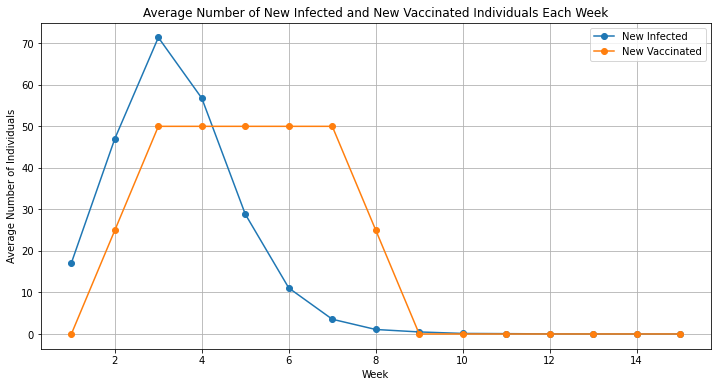

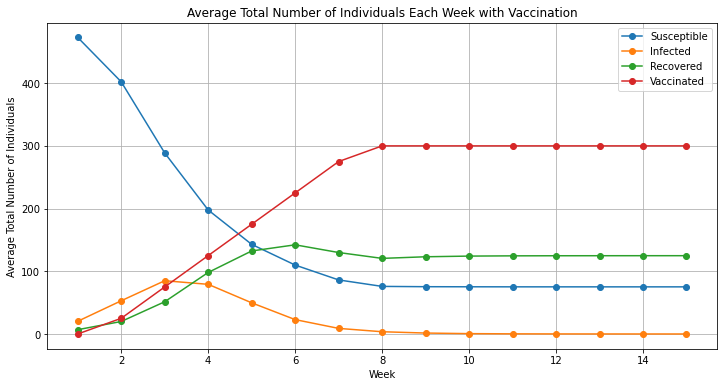

In [23]:
import networkx as nx
import numpy as np
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt
import scipy as sp

# Function to simulate an epidemic with vaccination on a given graph, with specified parameters and duration
def simulate_epidemic_with_vaccination(graph, beta, rho, vaccination_percentages, initial_infected, num_weeks):
    num_nodes = graph.shape[0]

    # Initialize states for each node (S, I, R, V)
    states = np.zeros(num_nodes)

    # Initialize infected nodes
    initial_infected_nodes = np.random.choice(num_nodes, initial_infected, replace=False)
    states[initial_infected_nodes] = 1  # Set state to infected

    # Lists to store results
    newly_infected_per_week = []
    newly_vaccinated_per_week = []
    total_states_per_week = {'S': [], 'I': [], 'R': [], 'V': []}

    # Simulation loop
    for week in range(num_weeks):
        # Distribute vaccination at the beginning of each week
        num_already_vaccinated = np.sum(states == 3)
        vaccinated_this_week = np.random.choice(
            np.where(states <= 2)[0], int((vaccination_percentages[week] / 100 * num_nodes) - num_already_vaccinated), replace=False
        )
        states[vaccinated_this_week] = 3  # Set state to vaccinated

        # Calculate transition probabilities
        infected_neighbors = graph @ (states == 1)
        infection_prob = 1 - np.power((1 - beta), infected_neighbors)
        recovery_prob = rho

        # Update states based on transition probabilities
        infected_mask = (states == 0) & (np.random.rand(num_nodes) < infection_prob)
        recovered_mask = (states == 1) & (np.random.rand(num_nodes) < recovery_prob)

        states[infected_mask] = 1  # Newly infected
        states[recovered_mask] = 2  # Recovered

        # Store results
        newly_infected_per_week.append(np.sum(infected_mask))
        newly_vaccinated_per_week.append(len(vaccinated_this_week))
        total_states_per_week['S'].append(np.sum(states == 0))
        total_states_per_week['I'].append(np.sum(states == 1))
        total_states_per_week['R'].append(np.sum(states == 2))
        total_states_per_week['V'].append(np.sum(states == 3))

    return newly_infected_per_week, newly_vaccinated_per_week, total_states_per_week

# Function to plot results with vaccination
def plot_results_with_vaccination(
    newly_infected_per_week, newly_vaccinated_per_week, total_states_per_week, num_weeks
):
    weeks = np.arange(1, num_weeks + 1)

    # Plot the average number of new infected and newly vaccinated individuals each week
    plt.figure(figsize=(12, 6))
    plt.plot(weeks, np.mean(newly_infected_per_week, axis=0), label='New Infected', marker='o')
    plt.plot(
        weeks,
        np.mean(newly_vaccinated_per_week, axis=0),
        label='New Vaccinated',
        marker='o',
    )
    plt.xlabel('Week')
    plt.ylabel('Average Number of Individuals')
    plt.title('Average Number of New Infected and New Vaccinated Individuals Each Week')
    plt.legend()
    plt.grid(True)
    plt.savefig("with_vaccine")
    plt.show()

    # Plot the average total number of susceptible, infected, recovered, and vaccinated individuals each week
    plt.figure(figsize=(12, 6))
    plt.plot(weeks, np.mean(total_states_per_week['S'], axis=0), label='Susceptible', marker='o')
    plt.plot(weeks, np.mean(total_states_per_week['I'], axis=0), label='Infected', marker='o')
    plt.plot(weeks, np.mean(total_states_per_week['R'], axis=0), label='Recovered', marker='o')
    plt.plot(weeks, np.mean(total_states_per_week['V'], axis=0), label='Vaccinated', marker='o')
    plt.xlabel('Week')
    plt.ylabel('Average Total Number of Individuals')
    plt.title('Average Total Number of Individuals Each Week with Vaccination')
    plt.legend()
    plt.grid(True)
    plt.savefig("with_vaccine_1")
    plt.show()

# Parameters for the simulation with vaccination
N = 100
num_weeks = 15
beta = 0.3
rho = 0.7
initial_infected = 10
vaccination_percentages = [0, 5, 15, 25, 35, 45, 55, 60, 60, 60, 60, 60, 60, 60, 60]

# Create a k-regular symmetric graph (G) with 500 nodes and k=6 using NetworkX
# G = nx.random_regular_graph(6, 500, seed=42)
# Use the previous preferential attachment graph
W = nx.adjacency_matrix(G)
# W = nx.convert_matrix.to_numpy_matrix(G)
Lambda = sp.sparse.lil_matrix(W)

# Simulate the epidemic with vaccination using the sparse matrix
newly_infected_per_week_all = []
newly_vaccinated_per_week_all = []
total_states_per_week_all_sparse = {'S': [], 'I': [], 'R': [], 'V' : []}

for _ in range(N):
    newly_infected_per_week, newly_vaccinated_per_week, total_states_per_week_sparse = simulate_epidemic_with_vaccination(
        Lambda, beta, rho, vaccination_percentages, initial_infected, num_weeks
    )
    newly_infected_per_week_all.append(newly_infected_per_week)
    newly_vaccinated_per_week_all.append(newly_vaccinated_per_week)
    total_states_per_week_all_sparse['S'].append(total_states_per_week_sparse['S'])
    total_states_per_week_all_sparse['I'].append(total_states_per_week_sparse['I'])
    total_states_per_week_all_sparse['R'].append(total_states_per_week_sparse['R'])
    total_states_per_week_all_sparse['V'].append(total_states_per_week_sparse['V'])    

# Plot the results with vaccination
plot_results_with_vaccination(
    newly_infected_per_week_all, newly_vaccinated_per_week_all, total_states_per_week_all_sparse, num_weeks)

# Problem 4

#### Pandemic in Sweden, the objective is to found the best set of parameters that better simulate the real pandemic.

Better configuration found
Actual rmse  13.578168752326901
Better configuration found
Actual rmse  12.559272802727605
Better configuration found
Actual rmse  8.06225774829855
Better configuration found
Actual rmse  6.917273065787317
Better configuration found
Actual rmse  6.602019892931758
Better configuration found
Actual rmse  6.468951486395098
Better configuration found
Actual rmse  5.384979108594573
Better configuration found
Actual rmse  4.356145084819834
Count:  216
Best configuration/rmse  [10, 0.2, 0.8] 4.356145084819834


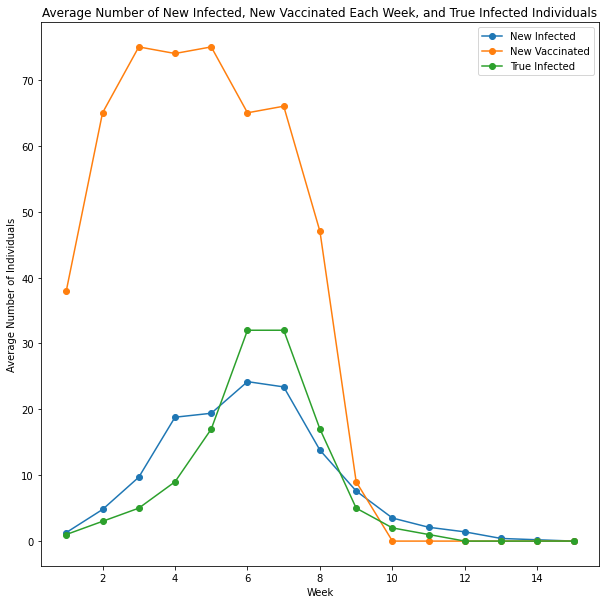

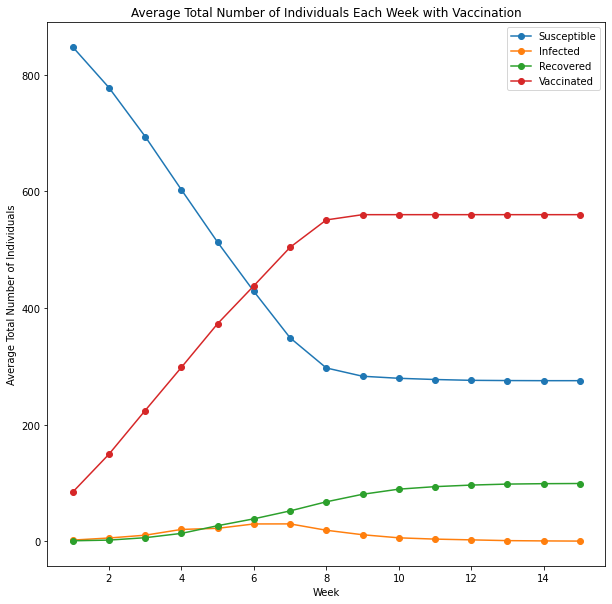

In [24]:
import networkx as nx
import numpy as np
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.metrics import mean_squared_error

# Function to simulate the epidemic with vaccination on a given graph, with specified parameters and duration
def simulate_epidemic_with_vaccination(graph, beta, rho, vaccination_percentages, initial_infected, num_weeks):
    num_nodes = graph.shape[0]

    # Initialize states for each node (S, I, R, V)
    states = np.zeros(num_nodes)
    
    # Initialize vaccinated individuals
    initial_vaccinated = np.random.choice(
        np.where(states <= 2)[0], int(vaccination_percentages[0] / 100 * num_nodes), replace=False
    )
    states[initial_vaccinated] = 3  # Set state to vaccinated
    
    # Initialize infected nodes
    initial_infected_nodes = np.random.choice(np.where(states != 2)[0], initial_infected, replace=False)
    states[initial_infected_nodes] = 1  # Set state to infected
    
    # Lists to store results
    newly_infected_per_week = []
    newly_vaccinated_per_week = []
    total_states_per_week = {'S': [], 'I': [], 'R': [], 'V': []}

    # Simulation loop
    for week in range(num_weeks):
        # Distribute vaccination at the beginning of each week
        num_already_vaccinated = np.sum(states == 3)
        vaccinated_this_week = np.random.choice(
            np.where(states <= 2)[0], int((vaccination_percentages[week+1] / 100 * num_nodes) - num_already_vaccinated), replace=False
        )
        states[vaccinated_this_week] = 3  # Set state to vaccinated
        
        # Calculate transition probabilities
        infected_neighbors = graph @ (states == 1)
        infection_prob = 1 - np.power((1 - beta), infected_neighbors)
        recovery_prob = rho

        # Update states based on transition probabilities
        infected_mask = (states == 0) & (np.random.rand(num_nodes) < infection_prob)
        recovered_mask = (states == 1) & (np.random.rand(num_nodes) < recovery_prob)

        states[infected_mask] = 1  # Newly infected
        states[recovered_mask] = 2  # Recovered

        # Store results
        newly_infected_per_week.append(np.sum(infected_mask))
        newly_vaccinated_per_week.append(len(vaccinated_this_week))
        total_states_per_week['S'].append(np.sum(states == 0))
        total_states_per_week['I'].append(np.sum(states == 1))
        total_states_per_week['R'].append(np.sum(states == 2))
        total_states_per_week['V'].append(np.sum(states == 3))

    return newly_infected_per_week, newly_vaccinated_per_week, total_states_per_week

# Function to plot results with vaccination
def plot_results_with_vaccination(
    newly_infected_per_week, newly_vaccinated_per_week, total_states_per_week, num_weeks, true_infected
):
    weeks = np.arange(1, num_weeks + 1)

    # Plot the average number of new infected, new vaccinated, and true infected individuals each week
    plt.figure(figsize=(10, 10))
    plt.plot(weeks, np.mean(newly_infected_per_week, axis=0), label='New Infected', marker='o')
    plt.plot(
        weeks,
        np.mean(newly_vaccinated_per_week, axis=0),
        label='New Vaccinated',
        marker='o',
    )
    plt.plot(
        weeks,
        true_infected[1:],
        label='True Infected',
        marker='o',
    )    
    plt.xlabel('Week')
    plt.ylabel('Average Number of Individuals')
    plt.title('Average Number of New Infected, New Vaccinated Each Week, and True Infected Individuals')
    plt.legend()
    plt.show()

    # Plot the average total number of susceptible, infected, recovered, and vaccinated individuals each week
    plt.figure(figsize=(10, 10))
    plt.plot(weeks, np.mean(total_states_per_week['S'], axis=0), label='Susceptible', marker='o')
    plt.plot(weeks, np.mean(total_states_per_week['I'], axis=0), label='Infected', marker='o')
    plt.plot(weeks, np.mean(total_states_per_week['R'], axis=0), label='Recovered', marker='o')
    plt.plot(weeks, np.mean(total_states_per_week['V'], axis=0), label='Vaccinated', marker='o')
    plt.xlabel('Week')
    plt.ylabel('Average Total Number of Individuals')
    plt.title('Average Total Number of Individuals Each Week with Vaccination')
    plt.legend()
    plt.show()

# Parameters for the vaccination simulation
delta_k = 1
delta_b = 0.1
delta_p = 0.1
k0 = 10
b0 = 0.3
p0 = 0.6
parameters = {'k':[k0-delta_k, k0, k0+delta_k], 'b':[b0-delta_b, b0, b0+delta_b], 'p':[p0-delta_p, p0, p0+delta_p]}
parameters = {'k':[7,8,9,10,11,12], 'b':[0.1,0.2,0.3,0.4,0.5,0.6], 'p':[0.4,0.5,0.6,0.7,0.8,0.9]}
best_config = [0,0,0]
N = 10
num_weeks = 15
vaccination_percentages = np.array([5, 9, 16, 24, 32, 40, 47, 54, 59, 60, 60, 60, 60, 60, 60, 60])
true_infected =  np.array([1, 1, 3, 5, 9, 17, 32, 32, 17, 5, 2, 1, 0, 0, 0, 0])
initial_infected = true_infected[0]
error = float('inf')

# Simulation of the epidemic with vaccination using the sparse matrix
newly_infected_per_week_all = []
newly_vaccinated_per_week_all = []
total_states_per_week_all_sparse = {'S': [], 'I': [], 'R': [], 'V' : []}

final_infection_plot = []
final_vaccination_plot = []
final_states_plot = {'S': [], 'I': [], 'R': [], 'V' : []}
count = 0
for k in parameters['k']:
    total_nodes = 934
    # Generate a complete graph with k+1 nodes
    G = nx.complete_graph(k+1)
    W = nx.adjacency_matrix(G)
    w = W.toarray().sum(axis=1)

    if k % 2 == 0:
        for i in range(k+1, total_nodes):
            w_for = np.copy(w)
            G.add_node(i)
            for j in range(k//2):
                link = np.random.choice(len(w_for), p = w_for/sum(w_for))
                G.add_edge(i, link)
                w[link] += 1
                w_for[link] = 0
            w = np.append(w, k/2)
    else:
        for i in range(k+1, total_nodes):
            w_for = np.copy(w)
            G.add_node(i)
            num_links = k // 2 if i % 2 == 0 else k // 2 + 1
            for j in range(num_links):
                link = np.random.choice(len(w_for), p = w_for/sum(w_for))
                G.add_edge(i, link)
                w[link] += 1
                w_for[link] = 0
            w = np.append(w, num_links)

    W = nx.adjacency_matrix(G)
    Lambda = sp.sparse.lil_matrix(W)
    
    for b in parameters['b']:
        for p in parameters['p']:
            count += 1
            for _ in range(N):
                newly_infected_per_week, newly_vaccinated_per_week, total_states_per_week_sparse = simulate_epidemic_with_vaccination(
                    Lambda, b, p, vaccination_percentages, initial_infected, num_weeks
                )
                newly_infected_per_week_all.append(newly_infected_per_week)
                newly_vaccinated_per_week_all.append(newly_vaccinated_per_week)
                total_states_per_week_all_sparse['S'].append(total_states_per_week_sparse['S'])
                total_states_per_week_all_sparse['I'].append(total_states_per_week_sparse['I'])
                total_states_per_week_all_sparse['R'].append(total_states_per_week_sparse['R'])
                total_states_per_week_all_sparse['V'].append(total_states_per_week_sparse['V'])
            
            # Calculate mean squared error
            mse = mean_squared_error(true_infected[1:], np.mean(newly_infected_per_week_all, axis=0))

            # Calculate root mean squared error to get RMSE
            rmse = np.sqrt(mse)
            
            # Check for the best configuration
            if rmse < error:
                error = rmse
                final_infection_plot = newly_infected_per_week_all
                final_vaccination_plot = newly_vaccinated_per_week_all
                final_states_plot = total_states_per_week_all_sparse
                best_config[0] = k
                best_config[1] = b
                best_config[2] = p
                print("Better configuration found")
                print("Actual rmse ", error)
            
            newly_infected_per_week_all = []
            newly_vaccinated_per_week_all = []
            total_states_per_week_all_sparse = {'S': [], 'I': [], 'R': [], 'V' : []}

print("Count: ", count)                
print("Best configuration/rmse ", best_config, error)

# Plot the results with vaccination
plot_results_with_vaccination(
    final_infection_plot, final_vaccination_plot, final_states_plot, num_weeks, true_infected)


# Exercise 2 - Coloring

## a)

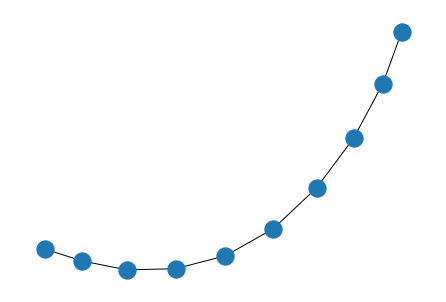

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy as sp
import random
# Create a line Graph with 10 nodes
G = nx.path_graph(10)

pos = nx.spring_layout(G)

nx.draw(G, pos=pos)

plt.show()

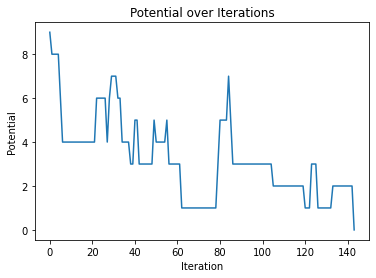

In [26]:
coloring_mapping = {0:'red', 1:'green'}
num_colors = 2
W = nx.adjacency_matrix(G)
num_nodes = W.shape[0]
colors = np.zeros(num_nodes)
time = 0
cost_history = []
while True:
    prob_matrix = []
    cost = 0
    time += 1
    # Select a random node 
    node = random.randint(0,num_nodes-1)
    # Compute for the node the probality for each color
    red_neighbors = W.toarray()[node] @ (colors == 0)
    green_neighbors = W.toarray()[node] @ (colors == 1)

    prob_change_green_red = (np.power(math.e, (-time/100)*red_neighbors)
                   / (np.power(math.e, (-time/100)*green_neighbors) + np.power(math.e, (-time/100)*red_neighbors))
                  )
    prob_matrix.append(prob_change_green_red)
    prob_change_red_green = (np.power(math.e, (-time/100)*green_neighbors)
                   / (np.power(math.e, (-time/100)*green_neighbors) + np.power(math.e, (-time/100)*red_neighbors))
                  )
    prob_matrix.append(prob_change_red_green)
    
    prob_matrix = np.array(prob_matrix)
    
    # Set the color to the node based on the probabilities
    colors[node] = np.random.choice(num_colors, p = prob_matrix)

    # Compute for every node the number of neighbors with the same color and sum(potential function)
    for i in range(num_nodes):
        cost += W.toarray()[i] @ (colors == colors[i])
    cost = cost/2
    cost_history.append(cost)
    if cost == 0:
        break
# Plot cost over iterations
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Potential')
plt.title('Potential over Iterations')
plt.savefig("Coloring_1")
plt.show()

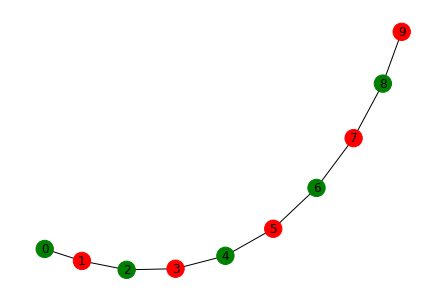

In [27]:
nx.draw(G, pos=pos, with_labels=True, node_color=[coloring_mapping[color] for color in colors])

plt.show()

## b)

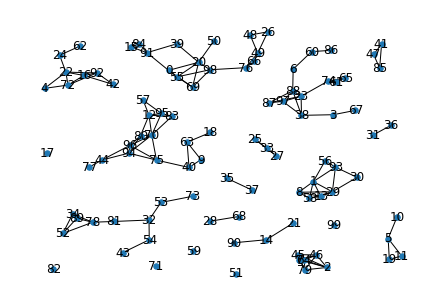

In [28]:
import scipy.io
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math

# Load wifi.mat and coord.mat
wifi_data = scipy.io.loadmat('wifi.mat')
coord_data = scipy.io.loadmat('coords.mat')

# Extract the adjacency matrix from wifi.mat
adjacency_matrix = wifi_data['wifi']

# Create a graph from the adjacency matrix
G = nx.Graph(adjacency_matrix)

# Extract the coordinates from coord.mat
coordinates = coord_data['coords']

# Create a dictionary to map node indices to their respective coordinates
pos = {i: (coordinates[i, 0], coordinates[i, 1]) for i in range(len(coordinates))}

# Draw the graph with node positions
nx.draw(G, pos=pos, with_labels=True, node_size=30)
plt.show()

#### Eta = t/100

Mininum_cost =  4.0


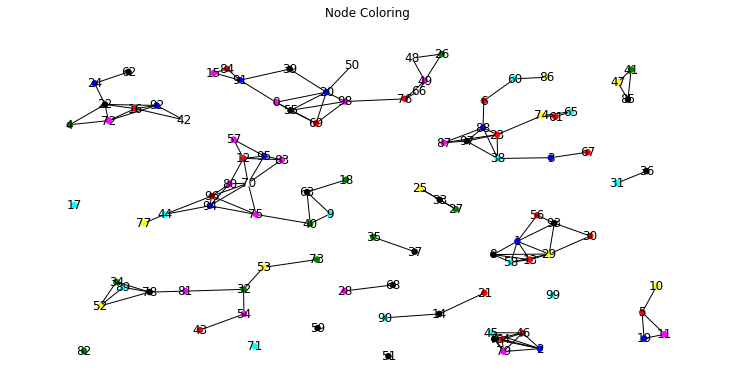

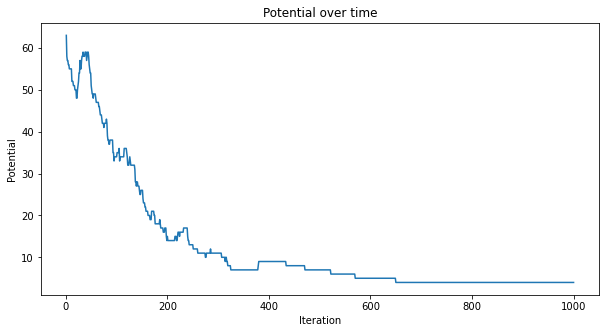

In [29]:
W = nx.adjacency_matrix(G)
color_mapping = {1 : 'red', 2 : 'green', 3 : 'blue', 4 : 'yellow', 5 : 'magenta', 6 : 'cyan', 7 : 'white', 8 :'black'}
num_colors = 8
num_nodes = W.shape[0]
colors = np.random.randint(1, num_colors + 1, size=num_nodes)
min_cost = float('inf')
min_colors = np.array([])
potentials = []
time = 0
N = 1000
#print(colors)
for i in range(N):
    prob_matrix = []
    cost = 0
    time += 1
    # Select a random node
    node = random.randint(0,num_nodes-1)
    
    # Compute the probabilities and append on the prob_matrix
    red_neighbors = W.toarray()[node] @ (2*(colors == 1).astype(int) + (colors == 2).astype(int))
    #print(red_neighbors)
    green_neighbors = W.toarray()[node] @ (2*(colors == 2).astype(int) + (colors == 1).astype(int) + (colors == 3).astype(int))
    #print(green_neighbors)
    blue_neignbors = W.toarray()[node] @ (2*(colors == 3).astype(int) + (colors == 2).astype(int) + (colors == 4).astype(int))
    #print(blue_neighbors)
    yellow_neighbors = W.toarray()[node] @ (2*(colors == 4).astype(int) + (colors == 3).astype(int) + (colors == 5).astype(int))
    magenta_neighbors = W.toarray()[node] @ (2*(colors == 5).astype(int) + (colors == 4).astype(int) + (colors == 6).astype(int))
    cyan_neighbors = W.toarray()[node] @ (2*(colors == 6).astype(int) + (colors == 5).astype(int) + (colors == 7).astype(int))
    white_neighbors = W.toarray()[node] @ (2*(colors == 7).astype(int) + (colors == 6).astype(int) + (colors == 8).astype(int))
    black_neighbors = W.toarray()[node] @ (2*(colors == 8).astype(int) + (colors == 7).astype(int)) 
    
    prob_change_red = (np.power(math.e, (-time/100)*red_neighbors)
                   / (np.power(math.e, (-time/100)*red_neighbors) + np.power(math.e, (-time/100)*green_neighbors)
                     + np.power(math.e, (-time/100)*blue_neignbors) + np.power(math.e, (-time/100)*yellow_neighbors)
                     + np.power(math.e, (-time/100)*magenta_neighbors) + np.power(math.e, (-time/100)*cyan_neighbors)
                     + np.power(math.e, (-time/100)*white_neighbors) + np.power(math.e, (-time/100)*black_neighbors) 
                     )
                  )
    prob_matrix.append(prob_change_red)
    prob_change_green = (np.power(math.e, (-time/100)*green_neighbors)
                   / (np.power(math.e, (-time/100)*red_neighbors) + np.power(math.e, (-time/100)*green_neighbors)
                     + np.power(math.e, (-time/100)*blue_neignbors) + np.power(math.e, (-time/100)*yellow_neighbors)
                     + np.power(math.e, (-time/100)*magenta_neighbors) + np.power(math.e, (-time/100)*cyan_neighbors)
                     + np.power(math.e, (-time/100)*white_neighbors) + np.power(math.e, (-time/100)*black_neighbors) 
                     )
                  )
    prob_matrix.append(prob_change_green)
    prob_change_blue = (np.power(math.e, (-time/100)*blue_neignbors)
                   / (np.power(math.e, (-time/100)*red_neighbors) + np.power(math.e, (-time/100)*green_neighbors)
                     + np.power(math.e, (-time/100)*blue_neignbors) + np.power(math.e, (-time/100)*yellow_neighbors)
                     + np.power(math.e, (-time/100)*magenta_neighbors) + np.power(math.e, (-time/100)*cyan_neighbors)
                     + np.power(math.e, (-time/100)*white_neighbors) + np.power(math.e, (-time/100)*black_neighbors) 
                     )
                  )
    prob_matrix.append(prob_change_blue)
    prob_change_yellow = (np.power(math.e, (-time/100)*yellow_neighbors)
                   / (np.power(math.e, (-time/100)*red_neighbors) + np.power(math.e, (-time/100)*green_neighbors)
                     + np.power(math.e, (-time/100)*blue_neignbors) + np.power(math.e, (-time/100)*yellow_neighbors)
                     + np.power(math.e, (-time/100)*magenta_neighbors) + np.power(math.e, (-time/100)*cyan_neighbors)
                     + np.power(math.e, (-time/100)*white_neighbors) + np.power(math.e, (-time/100)*black_neighbors) 
                     )
                  )
    prob_matrix.append(prob_change_yellow)
    prob_change_magenta = (np.power(math.e, (-time/100)*magenta_neighbors)
                   / (np.power(math.e, (-time/100)*red_neighbors) + np.power(math.e, (-time/100)*green_neighbors)
                     + np.power(math.e, (-time/100)*blue_neignbors) + np.power(math.e, (-time/100)*yellow_neighbors)
                     + np.power(math.e, (-time/100)*magenta_neighbors) + np.power(math.e, (-time/100)*cyan_neighbors)
                     + np.power(math.e, (-time/100)*white_neighbors) + np.power(math.e, (-time/100)*black_neighbors) 
                     )
                  )
    prob_matrix.append(prob_change_magenta)
    prob_change_cyan = (np.power(math.e, (-time/100)*cyan_neighbors)
                   / (np.power(math.e, (-time/100)*red_neighbors) + np.power(math.e, (-time/100)*green_neighbors)
                     + np.power(math.e, (-time/100)*blue_neignbors) + np.power(math.e, (-time/100)*yellow_neighbors)
                     + np.power(math.e, (-time/100)*magenta_neighbors) + np.power(math.e, (-time/100)*cyan_neighbors)
                     + np.power(math.e, (-time/100)*white_neighbors) + np.power(math.e, (-time/100)*black_neighbors) 
                     )
                  )
    prob_matrix.append(prob_change_cyan)
    prob_change_white = (np.power(math.e, (-time/100)*white_neighbors)
                   / (np.power(math.e, (-time/100)*red_neighbors) + np.power(math.e, (-time/100)*green_neighbors)
                     + np.power(math.e, (-time/100)*blue_neignbors) + np.power(math.e, (-time/100)*yellow_neighbors)
                     + np.power(math.e, (-time/100)*magenta_neighbors) + np.power(math.e, (-time/100)*cyan_neighbors)
                     + np.power(math.e, (-time/100)*white_neighbors) + np.power(math.e, (-time/100)*black_neighbors) 
                     )
                  )
    prob_matrix.append(prob_change_white)
    prob_change_black = (np.power(math.e, (-time/100)*black_neighbors)
                   / (np.power(math.e, (-time/100)*red_neighbors) + np.power(math.e, (-time/100)*green_neighbors)
                     + np.power(math.e, (-time/100)*blue_neignbors) + np.power(math.e, (-time/100)*yellow_neighbors)
                     + np.power(math.e, (-time/100)*magenta_neighbors) + np.power(math.e, (-time/100)*cyan_neighbors)
                     + np.power(math.e, (-time/100)*white_neighbors) + np.power(math.e, (-time/100)*black_neighbors) 
                     )
                  )
    prob_matrix.append(prob_change_black)
    prob_matrix = np.array(prob_matrix)
    
    # Set the color of the node
    colors[node] = np.random.choice(range(1,num_colors+1), p = prob_matrix)
    
    # Compute the potential
    for i in range(num_nodes):
        if colors[i] == 1:
            cost += W.toarray()[i] @ (2*(colors == 1).astype(int) + (colors == 2).astype(int))
        elif colors[i] == 8:
            cost += W.toarray()[i] @ (2*(colors == 8).astype(int) + (colors == 7).astype(int))
        else:
            cost += W.toarray()[i] @ (2*(colors == colors[i]).astype(int) + (colors == (colors[i]-1)).astype(int)
                                     + (colors == (colors[i]+1)).astype(int))
    cost = cost/2
    potentials.append(cost)
    # Select the min potential
    if cost < min_cost:
        min_cost = cost
        min_colors = colors
print ("Mininum_cost = ", min_cost)
# Plot del risultato finale
plt.figure(figsize=(10, 5))
nx.draw(G, pos=pos, with_labels=True, node_size=30, node_color=[color_mapping[c] for c in min_colors])
plt.title('Node Coloring')
plt.savefig("Coloring_2")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, N+1), potentials)
plt.xlabel('Iteration')
plt.ylabel('Potential')
plt.title('Potential over time')
plt.savefig("coloring_3")
plt.show()

#### Different Cost Functions

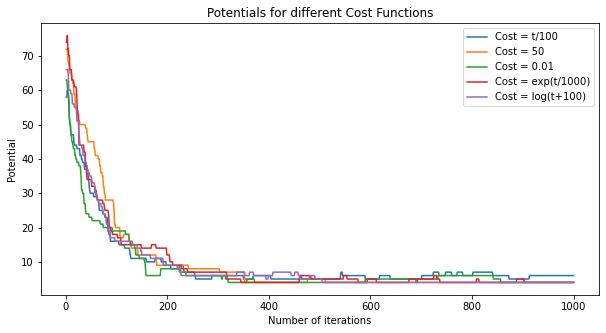

In [32]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# Definizione del grafo (puoi usare il tuo metodo per generare G)
W = nx.adjacency_matrix(G)
color_mapping = {1: 'red', 2: 'green', 3: 'blue', 4: 'yellow', 5: 'magenta', 6: 'cyan', 7: 'white', 8: 'black'}
num_colors = 8
num_nodes = W.shape[0]
colors = np.random.randint(1, num_colors + 1, size=num_nodes)
N = 1000
potentials =[]
for i in range(5):
    potentials_eta = []
    time = 0
    for i in range(N):
        prob_matrix = []
        cost = 0
        time += 1
        if i == 0:
            eta = time/100
        if i ==1:
            eta = 50
        if i == 2:
            eta = 0.01
        if i == 3:
            eta = math.exp(time/1000)
        if i == 4:
            eta = math.log(time+100)
        # Select a random node
        node = random.randint(0, num_nodes - 1)

        # Compute the probabilities and append on the prob_matrix
        red_neighbors = W.toarray()[node] @ (2 * (colors == 1).astype(int) + (colors == 2).astype(int))
        green_neighbors = W.toarray()[node] @ (
                2 * (colors == 2).astype(int) + (colors == 1).astype(int) + (colors == 3).astype(int))
        blue_neignbors = W.toarray()[node] @ (
                2 * (colors == 3).astype(int) + (colors == 2).astype(int) + (colors == 4).astype(int))
        yellow_neighbors = W.toarray()[node] @ (
                2 * (colors == 4).astype(int) + (colors == 3).astype(int) + (colors == 5).astype(int))
        magenta_neighbors = W.toarray()[node] @ (
                2 * (colors == 5).astype(int) + (colors == 4).astype(int) + (colors == 6).astype(int))
        cyan_neighbors = W.toarray()[node] @ (
                2 * (colors == 6).astype(int) + (colors == 5).astype(int) + (colors == 7).astype(int))
        white_neighbors = W.toarray()[node] @ (
                2 * (colors == 7).astype(int) + (colors == 6).astype(int) + (colors == 8).astype(int))
        black_neighbors = W.toarray()[node] @ (
                2 * (colors == 8).astype(int) + (colors == 7).astype(int))

        prob_change_red = (np.power(math.e, (-eta) * red_neighbors)
                           / (np.power(math.e, (-eta) * red_neighbors) + np.power(math.e, (-eta) * green_neighbors)
                              + np.power(math.e, (-eta) * blue_neignbors) + np.power(math.e, (-eta) * yellow_neighbors)
                              + np.power(math.e, (-eta) * magenta_neighbors) + np.power(math.e, (-eta) * cyan_neighbors)
                              + np.power(math.e, (-eta) * white_neighbors) + np.power(math.e, (-eta) * black_neighbors)
                              )
                           )
        prob_matrix.append(prob_change_red)
        prob_change_green = (np.power(math.e, (-eta) * green_neighbors)
                             / (np.power(math.e, (-eta) * red_neighbors) + np.power(math.e, (-eta) * green_neighbors)
                                + np.power(math.e, (-eta) * blue_neignbors) + np.power(math.e, (-eta) * yellow_neighbors)
                                + np.power(math.e, (-eta) * magenta_neighbors) + np.power(math.e, (-eta) * cyan_neighbors)
                                + np.power(math.e, (-eta) * white_neighbors) + np.power(math.e, (-eta) * black_neighbors)
                                )
                             )
        prob_matrix.append(prob_change_green)
        prob_change_blue = (np.power(math.e, (-eta) * blue_neignbors)
                            / (np.power(math.e, (-eta) * red_neighbors) + np.power(math.e, (-eta) * green_neighbors)
                               + np.power(math.e, (-eta) * blue_neignbors) + np.power(math.e, (-eta) * yellow_neighbors)
                               + np.power(math.e, (-eta) * magenta_neighbors) + np.power(math.e, (-eta) * cyan_neighbors)
                               + np.power(math.e, (-eta) * white_neighbors) + np.power(math.e, (-eta) * black_neighbors)
                               )
                            )
        prob_matrix.append(prob_change_blue)
        prob_change_yellow = (np.power(math.e, (-eta) * yellow_neighbors)
                              / (np.power(math.e, (-eta) * red_neighbors) + np.power(math.e, (-eta) * green_neighbors)
                                 + np.power(math.e, (-eta) * blue_neignbors) + np.power(math.e, (-eta) * yellow_neighbors)
                                 + np.power(math.e, (-eta) * magenta_neighbors) + np.power(math.e, (-eta) * cyan_neighbors)
                                 + np.power(math.e, (-eta) * white_neighbors) + np.power(math.e, (-eta) * black_neighbors)
                                 )
                              )
        prob_matrix.append(prob_change_yellow)
        prob_change_magenta = (np.power(math.e, (-eta) * magenta_neighbors)
                               / (np.power(math.e, (-eta) * red_neighbors) + np.power(math.e, (-eta) * green_neighbors)
                                  + np.power(math.e, (-eta) * blue_neignbors) + np.power(math.e, (-eta) * yellow_neighbors)
                                  + np.power(math.e, (-eta) * magenta_neighbors) + np.power(math.e, (-eta) * cyan_neighbors)
                                  + np.power(math.e, (-eta) * white_neighbors) + np.power(math.e, (-eta) * black_neighbors)
                                  )
                               )
        prob_matrix.append(prob_change_magenta)
        prob_change_cyan = (np.power(math.e, (-eta) * cyan_neighbors)
                            / (np.power(math.e, (-eta) * red_neighbors) + np.power(math.e, (-eta) * green_neighbors)
                               + np.power(math.e, (-eta) * blue_neignbors) + np.power(math.e, (-eta) * yellow_neighbors)
                               + np.power(math.e, (-eta) * magenta_neighbors) + np.power(math.e, (-eta) * cyan_neighbors)
                               + np.power(math.e, (-eta) * white_neighbors) + np.power(math.e, (-eta) * black_neighbors)
                               )
                            )
        prob_matrix.append(prob_change_cyan)
        prob_change_white = (np.power(math.e, (-eta) * white_neighbors)
                             / (np.power(math.e, (-eta) * red_neighbors) + np.power(math.e, (-eta) * green_neighbors)
                                + np.power(math.e, (-eta) * blue_neignbors) + np.power(math.e, (-eta) * yellow_neighbors)
                                + np.power(math.e, (-eta) * magenta_neighbors) + np.power(math.e, (-eta) * cyan_neighbors)
                                + np.power(math.e, (-eta) * white_neighbors) + np.power(math.e, (-eta) * black_neighbors)
                                )
                             )
        prob_matrix.append(prob_change_white)
        prob_change_black = (np.power(math.e, (-eta) * black_neighbors)
                             / (np.power(math.e, (-eta) * red_neighbors) + np.power(math.e, (-eta) * green_neighbors)
                                + np.power(math.e, (-eta) * blue_neignbors) + np.power(math.e, (-eta) * yellow_neighbors)
                                + np.power(math.e, (-eta) * magenta_neighbors) + np.power(math.e, (-eta) * cyan_neighbors)
                                + np.power(math.e, (-eta) * white_neighbors) + np.power(math.e, (-eta) * black_neighbors)
                                )
                             )
        prob_matrix.append(prob_change_black)
        prob_matrix = np.array(prob_matrix)

        # Set the color of the node
        colors[node] = np.random.choice(range(1, num_colors + 1), p=prob_matrix)

        # Compute the potential
        for i in range(num_nodes):
            if colors[i] == 1:
                cost += W.toarray()[i] @ (2 * (colors == 1).astype(int) + (colors == 2).astype(int))
            elif colors[i] == 8:
                cost += W.toarray()[i] @ (2 * (colors == 8).astype(int) + (colors == 7).astype(int))
            else:
                cost += W.toarray()[i] @ (
                        2 * (colors == colors[i]).astype(int) + (colors == (colors[i] - 1)).astype(int)
                        + (colors == (colors[i] + 1)).astype(int))
        cost = cost / 2
        potentials_eta.append(cost)
    
    potentials.append(potentials_eta)
    colors = np.random.randint(1, num_colors + 1, size=num_nodes)

plt.figure(figsize=(10, 5))
plt.plot(range(1, N+1), potentials[0], label='Cost = t/100',)
plt.plot(range(1, N+1), potentials[1], label='Cost = 50',)
plt.plot(range(1, N+1), potentials[2], label='Cost = 0.01',)
plt.plot(range(1, N+1), potentials[3], label='Cost = exp(t/1000)',)
plt.plot(range(1, N+1), potentials[4], label='Cost = log(t+100)',)
plt.xlabel('Number of iterations')
plt.ylabel('Potential')
plt.title('Potentials for different Cost Functions')
plt.legend()
plt.savefig("Last_graph")
plt.show()
